# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

638

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
queryURL = f"{url}appid={weather_api_key}&units={units}&q="

response = requests.get(queryURL + city).json()

In [4]:
# set up empty lists for needed characters
city_id = []
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
processingRecord = 0
setNumber = 1

#start processing record at 1
processingRecord = 1
setNumber = 1

print("Beginning Data Retrieval")
print("-------------------------")

# loop through each city
for city in cities:
    
#Exception handling
    try:
        response = requests.get(queryURL + city).json()
        city_id.append(response['id'])
        city_name.append(response['name']) 
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity']) 
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max']) 
        wind_speed.append(response['wind']['speed'])
        cityResponse = response['name']   
        if processingRecord > 49:
            processingRecord = 0
            setNumber +=1
    
        else:
            processingRecord +=1

        print(f"Processing Record {processingRecord} of set {setNumber} | {cityResponse}")
        
    except:
        print("city not found. Skipping ...")
    continue
    
print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")

Beginning Data Retrieval
-------------------------
Processing Record 2 of set 1 | Albany
Processing Record 3 of set 1 | Hilo
Processing Record 4 of set 1 | Nome
Processing Record 5 of set 1 | Carnarvon
Processing Record 6 of set 1 | Puerto Ayora
Processing Record 7 of set 1 | Semporna
Processing Record 8 of set 1 | Rikitea
Processing Record 9 of set 1 | Haines Junction
Processing Record 10 of set 1 | Arraial do Cabo
Processing Record 11 of set 1 | New Norfolk
Processing Record 12 of set 1 | Bata
Processing Record 13 of set 1 | Cayenne
Processing Record 14 of set 1 | Belyy Yar
Processing Record 15 of set 1 | Chui
Processing Record 16 of set 1 | Bluff
city not found. Skipping ...
Processing Record 17 of set 1 | Kuandian
Processing Record 18 of set 1 | Yellowknife
Processing Record 19 of set 1 | Aklavik
Processing Record 20 of set 1 | Mataura
Processing Record 21 of set 1 | Escuinapa
Processing Record 22 of set 1 | Tāybād
city not found. Skipping ...
Processing Record 23 of set 1 | Cape T

Processing Record 35 of set 4 | Ushtobe
Processing Record 36 of set 4 | Mezen'
Processing Record 37 of set 4 | George Town
city not found. Skipping ...
Processing Record 38 of set 4 | Xichang
Processing Record 39 of set 4 | Dillon
Processing Record 40 of set 4 | Upernavik
Processing Record 41 of set 4 | Rawson
Processing Record 42 of set 4 | Palatka
city not found. Skipping ...
Processing Record 43 of set 4 | Xining
Processing Record 44 of set 4 | Kiryat Gat
Processing Record 45 of set 4 | Sidi Ali
Processing Record 46 of set 4 | Cabo San Lucas
Processing Record 47 of set 4 | Atar
Processing Record 48 of set 4 | Moba
Processing Record 49 of set 4 | Barra do Corda
Processing Record 50 of set 4 | Yatou
Processing Record 0 of set 5 | Saskylakh
Processing Record 1 of set 5 | Ossora
Processing Record 2 of set 5 | Alyangula
Processing Record 3 of set 5 | Jijiga
Processing Record 4 of set 5 | Teruel
Processing Record 5 of set 5 | Hamilton
Processing Record 6 of set 5 | Heiligenhafen
Processin

Processing Record 19 of set 8 | Batticaloa
Processing Record 20 of set 8 | Acaraú
Processing Record 21 of set 8 | Coos Bay
Processing Record 22 of set 8 | Pisz
Processing Record 23 of set 8 | Kerema
Processing Record 24 of set 8 | Doha
Processing Record 25 of set 8 | Domoni
Processing Record 26 of set 8 | Yam
Processing Record 27 of set 8 | Harper
city not found. Skipping ...
Processing Record 28 of set 8 | Magaria
Processing Record 29 of set 8 | Hambantota
Processing Record 30 of set 8 | Horki
city not found. Skipping ...
Processing Record 31 of set 8 | Kargasok
Processing Record 32 of set 8 | Ust-Kuyga
Processing Record 33 of set 8 | Yanam
Processing Record 34 of set 8 | Ola
Processing Record 35 of set 8 | Pangody
Processing Record 36 of set 8 | Jiayuguan City
Processing Record 37 of set 8 | Marzuq
city not found. Skipping ...
Processing Record 38 of set 8 | Wanning
Processing Record 39 of set 8 | Bilma
Processing Record 40 of set 8 | Malya
Processing Record 41 of set 8 | Cape Coast


Processing Record 50 of set 11 | Pedra Azul
city not found. Skipping ...
Processing Record 0 of set 12 | Riyadh
Processing Record 1 of set 12 | Tromsø
Processing Record 2 of set 12 | Nuuk
Processing Record 3 of set 12 | Waingapu
Processing Record 4 of set 12 | Caravelas
Processing Record 5 of set 12 | Ocampo
Processing Record 6 of set 12 | Manta
Processing Record 7 of set 12 | Ciudad Bolivar
Processing Record 8 of set 12 | Touros
Processing Record 9 of set 12 | Atambua
Processing Record 10 of set 12 | Sangīn
Processing Record 11 of set 12 | Ucluelet
Processing Record 12 of set 12 | Manggar
Processing Record 13 of set 12 | Talnakh
Processing Record 14 of set 12 | Kushiro
Processing Record 15 of set 12 | Åmot
Processing Record 16 of set 12 | Kūdligi
Processing Record 17 of set 12 | Mujiayingzi
city not found. Skipping ...
Processing Record 18 of set 12 | Dem'yanovo
Processing Record 19 of set 12 | Peniche
Processing Record 20 of set 12 | Markova
Processing Record 21 of set 12 | Sorong
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weatherDict = {
    "City ID":city_id, 
    "City Name":city_name, 
    "Cloudiness":cloudiness,
    "Country":country, 
    "Date":date, 
    "Humidity":humidity,
    "Latitude":lat,
    "Longitude":lng, 
    "Max Temperature":max_temp,
    "Wind Speed":wind_speed
}
weatherDict = pd.DataFrame(weatherDict)
weatherDict.head()

,City ID,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,5106841,Albany,99,US,1658773761,75,42.6001,-73.9662,84.38,12.68
1,5855927,Hilo,40,US,1658773937,70,19.7297,-155.0900,79.11,3.44
2,5870133,Nome,100,US,1658773771,87,64.5011,-165.4064,51.87,18.41
3,2074865,Carnarvon,0,AU,1658773937,38,-24.8667,113.6333,61.97,8.97
4,3652764,Puerto Ayora,73,EC,1658773937,90,-0.7393,-90.3518,78.76,8.01


In [6]:
weatherDict.count()

City ID            582
City Name          582
Cloudiness         582
Country            582
Date               582
Humidity           582
Latitude           582
Longitude          582
Max Temperature    582
Wind Speed         582
dtype: int64

In [7]:
weatherDict.to_csv("output_data/weatherDict.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
maxHumid = weatherDict.loc[weatherDict['Humidity'] != 100]
maxHumid.describe()

,City ID,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
count,5.730000e+02,573.000000,5.730000e+02,573.000000,573.000000,573.000000,573.000000,573.000000
mean,2.641626e+06,54.722513,1.658774e+09,70.551483,20.474608,19.570460,70.439686,7.885271
std,1.611715e+06,40.312565,9.255107e+01,21.920539,33.393980,88.877397,14.014330,5.162564
min,7.218100e+04,0.000000,1.658773e+09,12.000000,-54.800000,-175.200000,32.520000,0.000000
25%,1.504019e+06,12.000000,1.658774e+09,58.000000,-7.470600,-58.579600,60.930000,3.980000
50%,2.163355e+06,62.000000,1.658774e+09,77.000000,24.687700,24.971800,71.760000,6.850000
75%,3.622537e+06,100.000000,1.658774e+09,88.000000,49.154100,96.370000,80.220000,11.390000
max,8.079926e+06,100.000000,1.658774e+09,99.000000,78.218600,178.416700,102.880000,29.930000


In [9]:
#  Get the indices of cities that have humidity over 100%.
maxHumid.count()

City ID            573
City Name          573
Cloudiness         573
Country            573
Date               573
Humidity           573
Latitude           573
Longitude          573
Max Temperature    573
Wind Speed         573
dtype: int64

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [11]:
maxHumid.head()

,City ID,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,5106841,Albany,99,US,1658773761,75,42.6001,-73.9662,84.38,12.68
1,5855927,Hilo,40,US,1658773937,70,19.7297,-155.0900,79.11,3.44
2,5870133,Nome,100,US,1658773771,87,64.5011,-165.4064,51.87,18.41
3,2074865,Carnarvon,0,AU,1658773937,38,-24.8667,113.6333,61.97,8.97
4,3652764,Puerto Ayora,73,EC,1658773937,90,-0.7393,-90.3518,78.76,8.01


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

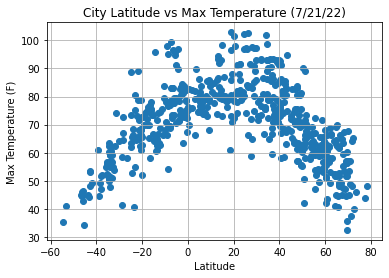

In [12]:
plt.scatter(maxHumid["Latitude"], maxHumid["Max Temperature"])
plt.title("City Latitude vs Max Temperature (7/21/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

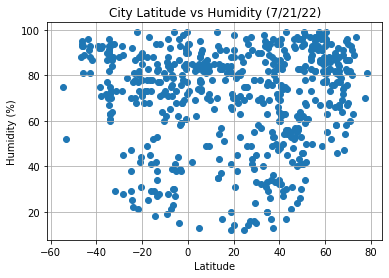

In [13]:
plt.scatter(maxHumid["Latitude"], maxHumid["Humidity"])
plt.title("City Latitude vs Humidity (7/21/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

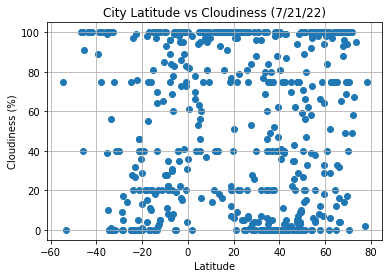

In [14]:
plt.scatter(maxHumid["Latitude"], maxHumid["Cloudiness"])
plt.title("City Latitude vs Cloudiness (7/21/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

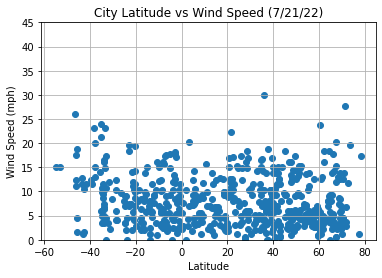

In [15]:
plt.scatter(maxHumid["Latitude"], maxHumid["Wind Speed"])
plt.title("City Latitude vs Wind Speed (7/21/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(0,45)
plt.grid()
plt.show()

## Linear Regression

In [16]:
north = maxHumid['Latitude'] >= 0
northernHem = maxHumid[north]
southernHem = maxHumid[~north]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.4735034526989445


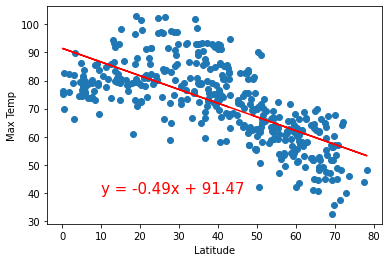

In [17]:
x_values = northernHem['Latitude']
y_values = northernHem['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.show()


There is a negative correlation between the latitude and the maximum temperature in the northern hemisphere. The farther we are from the equator, the colder the temperature seems to get.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.6230949335793045


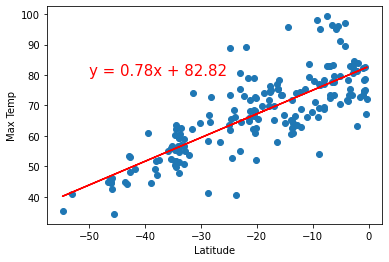

In [18]:
x_values = southernHem['Latitude']
y_values = southernHem['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.show()

There is a positive correlation between the latitude and the maximum temperature in the southern hemisphere. The closer we get to the equator, the warmer the temperature seems to get.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.018348910097872796


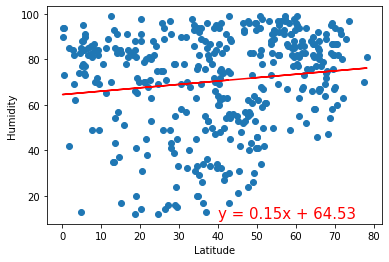

In [20]:
x_values = northernHem['Latitude']
y_values = northernHem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.show()
#plt.savefig("../Images/north_humid_lat.png")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.056024977067926494


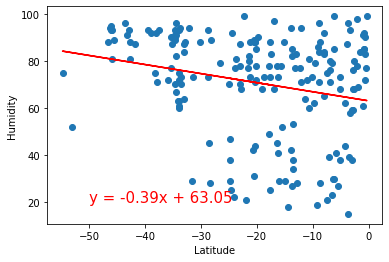

In [21]:
x_values = southernHem['Latitude']
y_values = southernHem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.show()
#plt.savefig("../Images/south_humid_lat.png")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.0003267012791515551


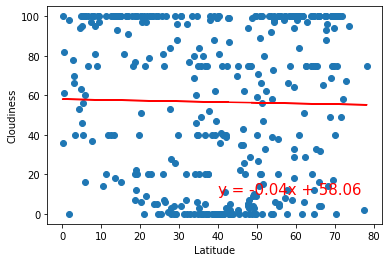

In [27]:
x_values = northernHem['Latitude']
y_values = northernHem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.show()
#plt.savefig("../Images/north_cloud_lat.png")


There is no correlation between the latitude and the cloudiness % in the northern hemisphere. As the latitude goes farther from the equator, the cloudiness data goes in various directions with no direct focal point

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.0007733184235139745


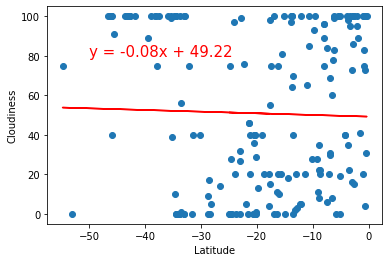

In [23]:
x_values = southernHem['Latitude']
y_values = southernHem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.show()
#plt.savefig("../Images/south_cloud_lat.png")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 1.775200790936172e-05


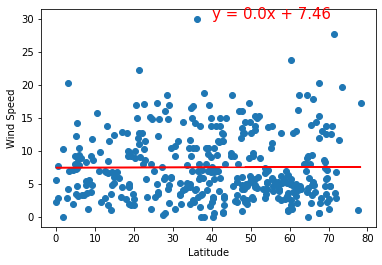

In [24]:
x_values = northernHem['Latitude']
y_values = northernHem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.05847018780055196


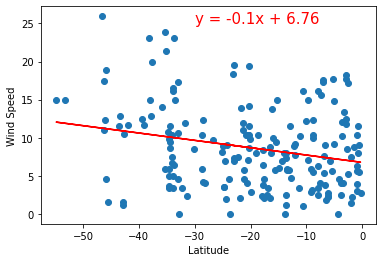

In [25]:
x_values = southernHem['Latitude']
y_values = southernHem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.show()